# PCA from similarity matrices

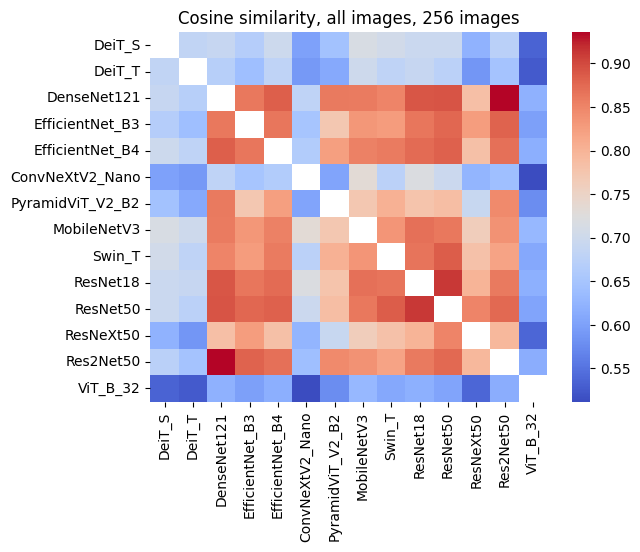

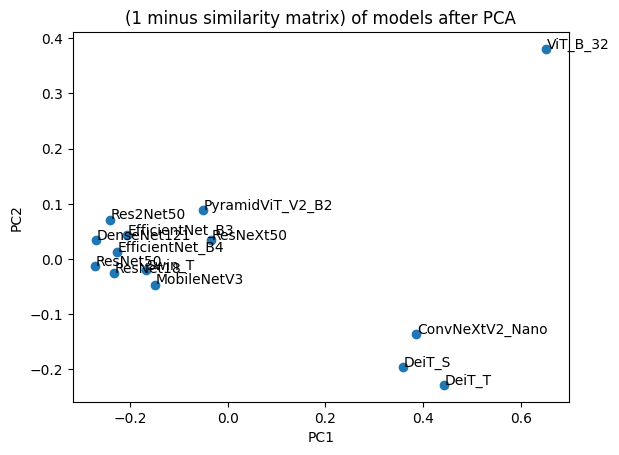

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = '20240417_1037_similarity_matrix_gradcam_cosine.csv'
df = pd.read_csv(path, index_col=0)

# plot heatmap
mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.title('Cosine similarity, all images, 256 images')
plt.savefig('heatmap_cosine_all.png')
plt.show()

# PCA of distances
df_distances = 1 - df
df_distances

# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'])
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.savefig('pca_cosine_all.png')
plt.show()


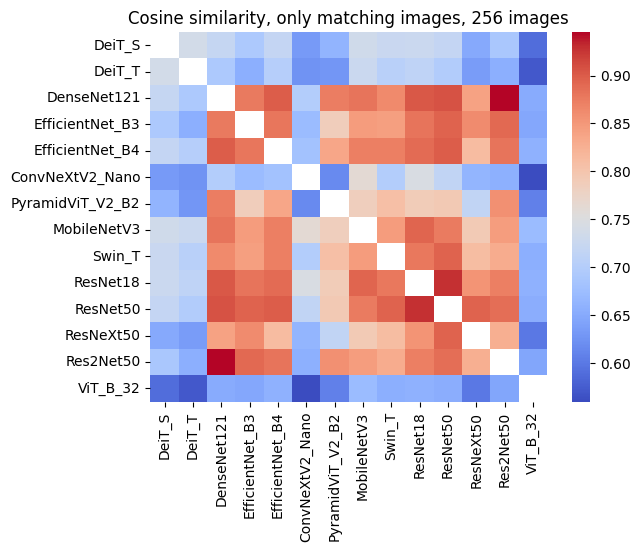

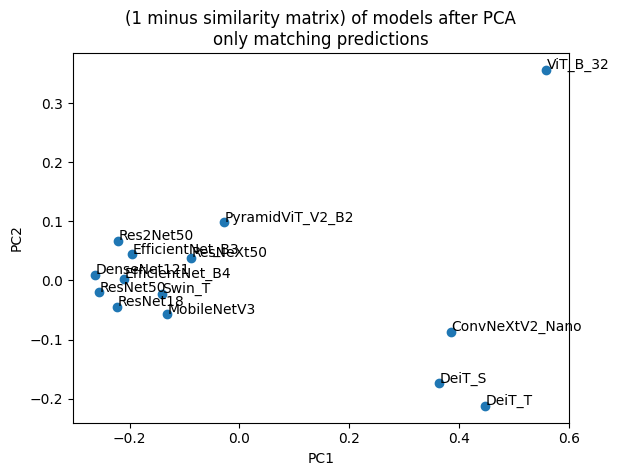

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = '20240417_1037_similarity_matrix_gradcam_cosine_only_matching.csv'
df = pd.read_csv(path, index_col=0)

# plot heatmap
mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.title('Cosine similarity, only matching images, 256 images')
plt.savefig('heatmap_cosine_only_matching.png')
plt.show()

# PCA of distances
df_distances = 1 - df
df_distances

# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'])
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA\nonly matching predictions')
plt.savefig('pca_cosine_only_matching_prediction.png')
plt.show()


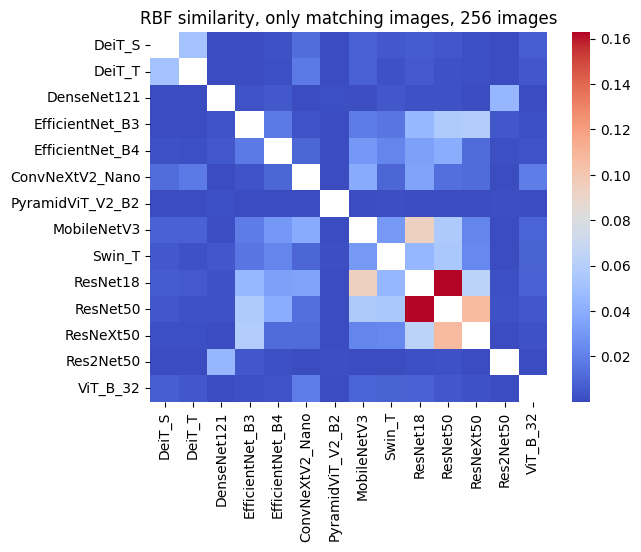

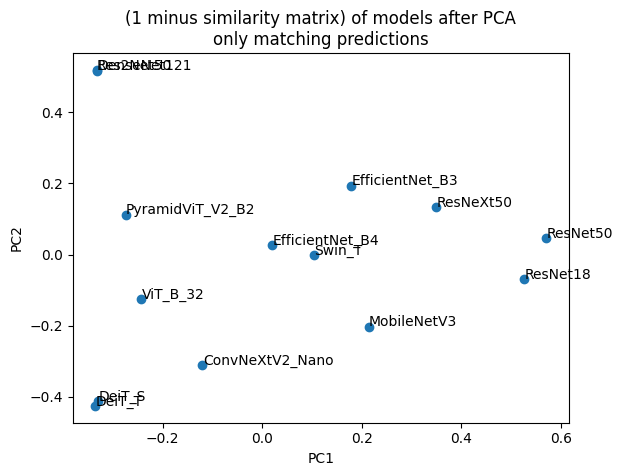

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = '20240417_1037_similarity_matrix_gradcam_rbf_only_matching.csv'
df = pd.read_csv(path, index_col=0)

# plot heatmap
mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.title('RBF similarity, only matching images, 256 images')
plt.savefig('heatmap_rbf_only_matching.png')
plt.show()

# PCA of distances
df_distances = 1 - df
df_distances

# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'])
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA\nonly matching predictions')
plt.savefig('pca_rbf_only_matching_prediction.png')
plt.show()


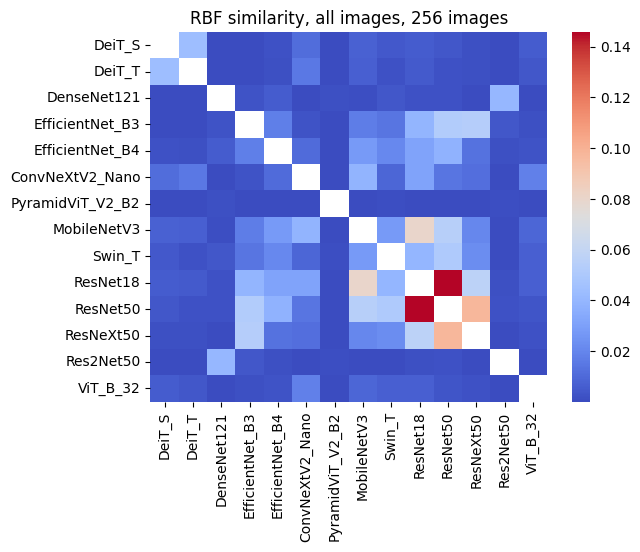

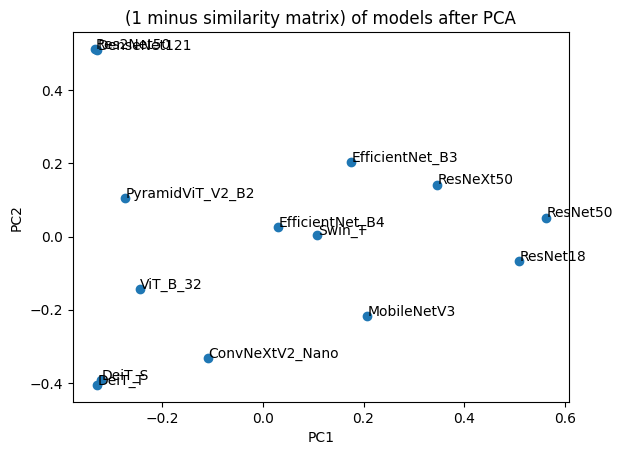

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = '20240417_1037_similarity_matrix_gradcam_rbf.csv'
df = pd.read_csv(path, index_col=0)

# plot heatmap
mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.title('RBF similarity, all images, 256 images')
plt.savefig('heatmap_rbf_all.png')
plt.show()

# PCA of distances
df_distances = 1 - df
df_distances

# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'])
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.savefig('pca_rbf.png')
plt.show()


# Correlation between same prediction counts and similarity matrices

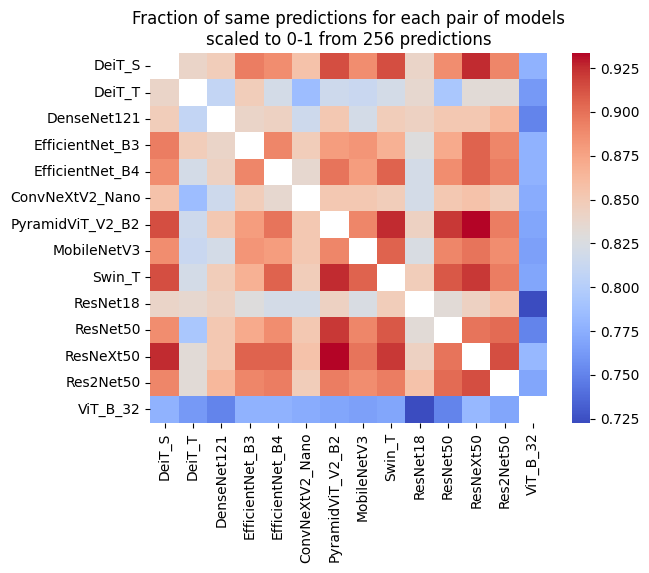

In [59]:
counts_df = pd.read_csv('20240417_1037_gradcam_same_predictions_count.csv', index_col=0)
sns.heatmap(counts_df / counts_df.iloc[0,0], cmap='coolwarm', mask=np.eye(counts_df.shape[0], dtype=bool))
plt.title('Fraction of same predictions for each pair of models\nscaled to 0-1 from 256 predictions')
plt.savefig('same_predictions_fractions_heatmap.png')
plt.show()

In [60]:
# compute correlation between all cosine similarity and same predictions matrices
df_similarity_all_cosine = pd.read_csv('20240417_1037_similarity_matrix_gradcam_cosine.csv', index_col=0)
correlation_1 = df_similarity_all_cosine.stack().corr(counts_df.stack())
print(f"Correlation between cosine similarity (all predictions) and same predictions matrices: {correlation_1:.3f}")

Correlation between cosine similarity (all predictions) and same predictions matrices: 0.696


In [61]:
# compute correlation between all cosine similarity and same predictions matrices
df_similarity_all_cosine = pd.read_csv('20240417_1037_similarity_matrix_gradcam_cosine_only_matching.csv', index_col=0)
correlation_2 = df_similarity_all_cosine.stack().corr(counts_df.stack())
print(f"Correlation between cosine similarity (matching predictions) and same predictions matrices: {correlation_2:.3f}")

Correlation between cosine similarity (matching predictions) and same predictions matrices: 0.672


In [62]:
# compute correlation between all cosine similarity and same predictions matrices
df_similarity_all_cosine = pd.read_csv('20240417_1037_similarity_matrix_gradcam_rbf.csv', index_col=0)
correlation_3 = df_similarity_all_cosine.stack().corr(counts_df.stack())
print(f"Correlation between rbf similarity (all predictions) and same predictions matrices: {correlation_3:.3f}")

Correlation between rbf similarity (all predictions) and same predictions matrices: 0.642


In [63]:
# compute correlation between all cosine similarity and same predictions matrices
df_similarity_all_cosine = pd.read_csv('20240417_1037_similarity_matrix_gradcam_rbf_only_matching.csv', index_col=0)
correlation_4 = df_similarity_all_cosine.stack().corr(counts_df.stack())
print(f"Correlation between rbf similarity (matching predictions) and same predictions matrices: {correlation_4:.3f}")

Correlation between rbf similarity (matching predictions) and same predictions matrices: 0.641


In [64]:
print("\nDataframe with correlations between a matrix of count of same predictions and different similarity matrices")
df_correlations = pd.DataFrame([[correlation_1, correlation_2], [correlation_3, correlation_4]], columns=['All images', 'Only matching predictions'], index=['cosine', 'rbf'])
df_correlations


Dataframe with correlations between a matrix of count of same predictions and different similarity matrices


,All images,Only matching predictions
cosine,0.695880,0.672233
rbf,0.642113,0.641272
